# STOCK PRICE PREDICTION USING LSTM AND SVR

**PROBLEM STATEMENT**

In the past, predictive models in stock trading would typically seek to predict the real future prices, a concept that can get very vulnerable in a market full of unpredictability and other externally induced economic factors. While all these approaches have their value, they are usually very risky with large forecast errors in conditions of market stress or unexpected news that could potentially lead to financial losses. This project aims to be at the forefront by shifting its focus from accurate prediction of future prices to understanding and predicting general price tendencies or actions. It allows the investor to find more general trends and cyclic behavior in the share prices. The objective of such an approach is to provide investors with a tool of strategic decision-making that has the highest place for mitigating risks and minimizing loss.

## Data Loading and Processing

**Data Loading**

1. The code begins with importing necessary python libraries in the project for data manipuation. 
2. It also imports the NASDAQ.csv dataset into a pandas dataframe.

**Preprocessing**

1. The 'date' column is converted to a date-time format and used as index for the Dataframe, helping in time-series analysis


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load and preprocess data
nasdaq_data_path = 'NASDAQ.csv'
nasdaq_data = pd.read_csv(nasdaq_data_path)
nasdaq_data['Date'] = pd.to_datetime(nasdaq_data['Date'])
nasdaq_data.set_index('Date', inplace=True)

This code does statistical analysis of the preprocessed data of the NASDAQ stock market. This is what each part contains.

**The describe()** function is used to summarize the central tendency, dispersion, and shape of the distribution of the dataset, excluding NaN values. This function provides a quick and useful view of basic statistics for all continuous metrics in the table (such as mean, standard deviation, min value, percentiles, and max value).
It runs for columns like 'Open', 'High', 'Low', 'Close', 'Volume', etc.

**Null Value Check**
Check the number of missing (null) values in each column of the DataFrame. Through this, a count of NaN values would sum up to give an indication of data quality. In this particular output, it seems there is no missing value in the columns shown.

In [23]:
# Descriptive statistics
print(nasdaq_data.describe())

# Check for null values
print(nasdaq_data.isnull().sum())

               Open          High           Low         Close     Adj Close  \
count   1258.000000   1258.000000   1258.000000   1258.000000   1258.000000   
mean   12026.854590  12116.596409  11929.208554  12028.924715  12028.924715   
std     2480.948180   2486.949595   2468.367275   2478.134439   2478.134439   
min     6847.279785   6984.939941   6631.419922   6860.669922   6860.669922   
25%    10401.925048  10498.320068  10310.200195  10393.652344  10393.652344   
50%    12153.229981  12236.005371  12056.435058  12170.750000  12170.750000   
75%    13984.129883  14056.887695  13881.469727  13973.220214  13973.220214   
max    16517.240234  16538.859375  16393.900391  16442.199219  16442.199219   

             Volume  
count  1.258000e+03  
mean   4.415810e+09  
std    1.378475e+09  
min    1.014530e+09  
25%    3.842122e+09  
50%    4.521350e+09  
75%    5.143635e+09  
max    1.162119e+10  
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0


## Visualization of NASDAQ Closing Prices

This plot is important in **Exploratory Data Analysis (EDA)**, a statistical approach to the analysis of datasets designed to synthesize its main characteristics, often with visual methods. 

In this case, a **time series plot** displays closing prices of stocks in the NASDAQ at different points in time, hence allowing an immediate visual assessment. Analysts can then, therefore, visualize and find patterns, seasonality, trends, and key changes or turning points by use of this visualization in the prices of stock. Some examples could be trends up or down in the plot of the data, periods of high volatility that could be critical for making investment decisions, or further statistical analysis and model building.

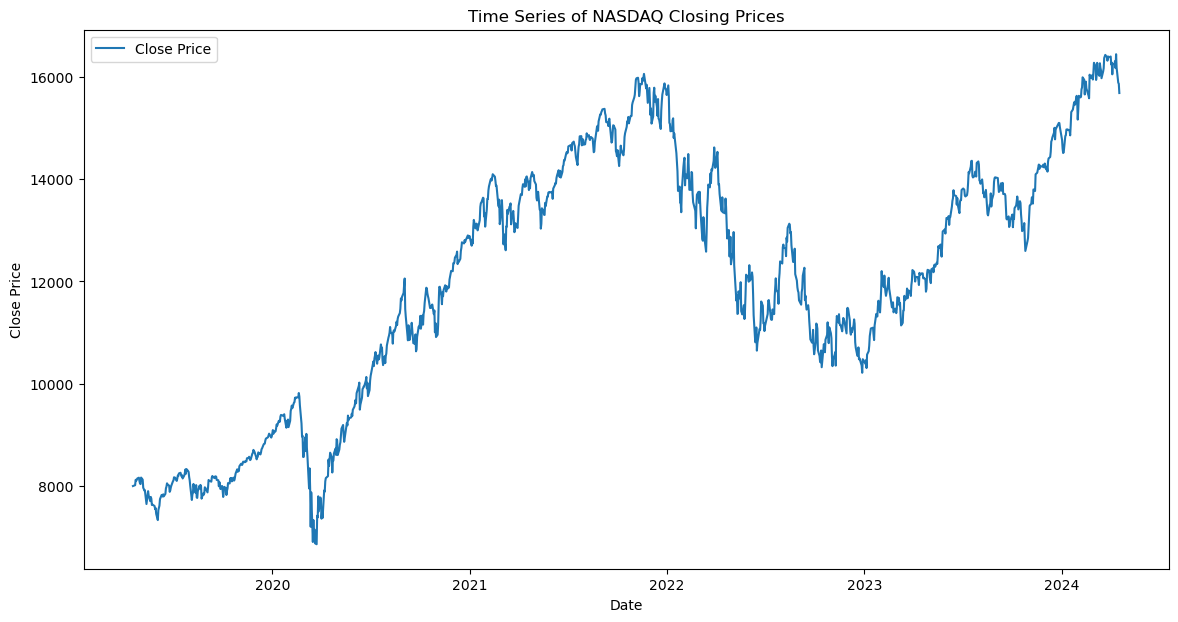

In [24]:
import matplotlib.pyplot as plt

# Plot closing prices over time
plt.figure(figsize=(14, 7))
plt.plot(nasdaq_data.index, nasdaq_data['Close'], label='Close Price')
plt.title('Time Series of NASDAQ Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


## Plotting Volitality

**Calculating Volatility:** The code first calculates the rolling standard deviation of the closing prices with a window of 20 days using nasdaq_data['Close'].rolling(window=20).std(). 

**The rolling standard deviation** is a measure of how much prices deviate from the average price over the past 20 days, providing a dynamic measure of volatility over time.

This visualization allows us to see how market volatility changes with time.

An example would be in spikes of rolling standard deviation, which denotes a period of high volatility; the prices have varied extensively from its recent average—usually corresponding to market events, news, or economic changes. Lower values of rolling standard deviation suggest a more stable period within the market.


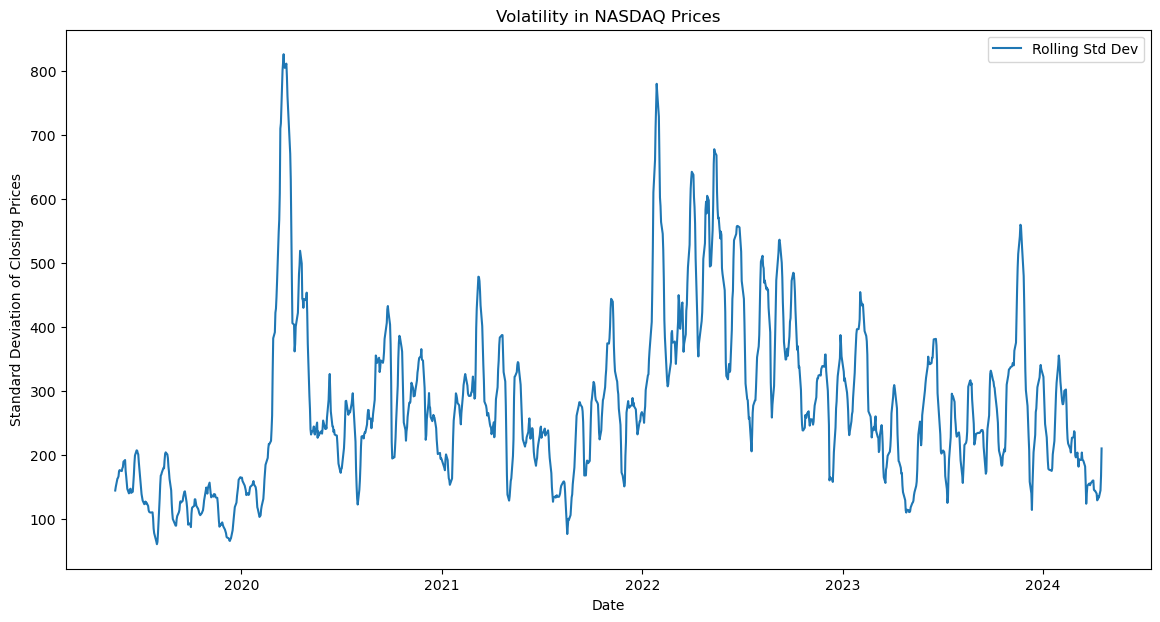

In [25]:
# Rolling standard deviation to see volatility
nasdaq_data['Rolling Std'] = nasdaq_data['Close'].rolling(window=20).std()

plt.figure(figsize=(14, 7))
plt.plot(nasdaq_data.index, nasdaq_data['Rolling Std'], label='Rolling Std Dev')
plt.title('Volatility in NASDAQ Prices')
plt.xlabel('Date')
plt.ylabel('Standard Deviation of Closing Prices')
plt.legend()
plt.show()


## Histogram for Daily Returns

The code calculates the daily returns using the pct_change() method on the 'Close' price column of the nasdaq_data DataFrame. The daily return is the percentage change in the closing price of the stock from one day to the next.

The histogram uses 50 bins to distribute the data, which helps to show the distribution of returns over the dataset. The alpha parameter is set to 0.75 to make the bars slightly transparent, and the color of the bars is set to blue.

The histogram of NASDAQ Daily Returns suggests a moderately volatile market with returns clustering around zero, indicating that significant daily gains or losses are not exceedingly common. The distribution's bell shape indicates a normal distribution of returns. 

No significant skewness implies a balanced occurrence of positive and negative returns. The tails of the histogram show some occurrence of extreme returns but are not as much. Overall, this visual analysis implies a relatively stable market behavior during the period analyzed, with no persistent bias toward either gains or losses.

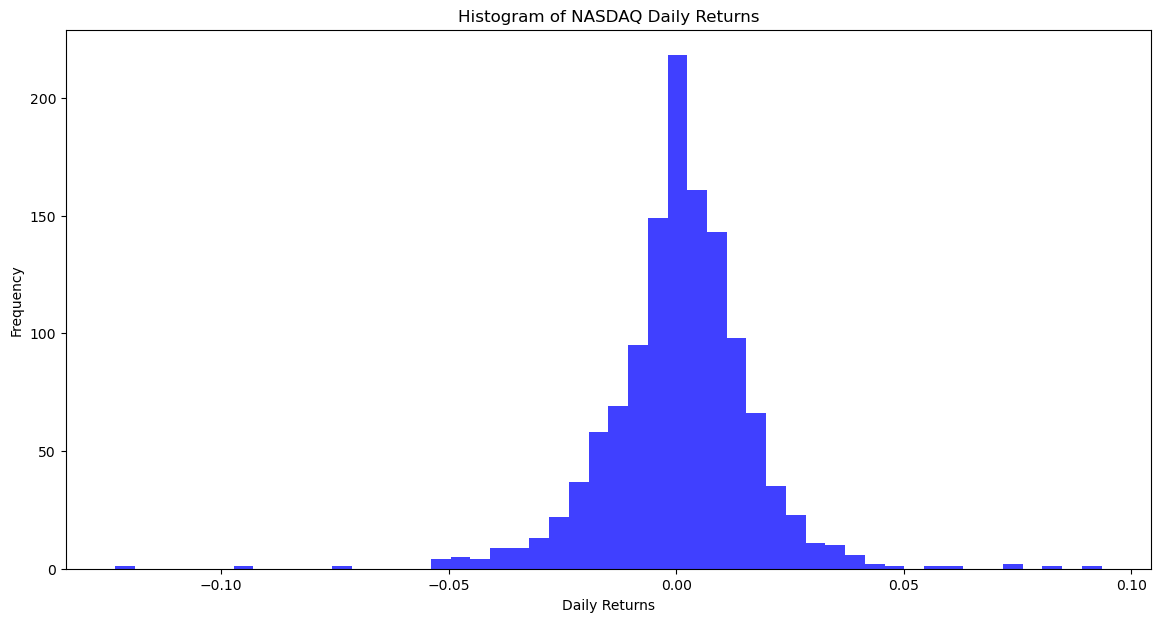

In [26]:
# Daily returns
nasdaq_data['Daily Returns'] = nasdaq_data['Close'].pct_change()

plt.figure(figsize=(14, 7))
plt.hist(nasdaq_data['Daily Returns'].dropna(), bins=50, alpha=0.75, color='blue')
plt.title('Histogram of NASDAQ Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()


## Technical Indicators

We have used indicators for technical analysis, which are a collection of rules applied to past market data to provide indication, predicting future price movements for traders. These offer a very insightful guideline towards the manner of helping the trader/investor make a more calculated decision by way of analyzing market trends, momentum, volatility, and investor sentiment.

**Simple moving averages (SMA) and exponential moving averages (EMA)** have been used very importantly in smoothing the data of a price to recognize the underlying trend of the price of a stock. Comparing the position of the price relative to an SMA or EMA, or even comparing these moving averages between themselves, can signal a bullish or bearish trend.

**Moving average convergence D**, simply MACD, is an indicator of momentum that exhibits the power, direction, momentum, and duration of the stock price trend. Accordingly, a crossover of the signal line by the MACD line would mean a buy or sell opportunity.

**The relative strength index (RSI)** is generally used to compute the conditions of overbought and oversold; it helps in understanding the speed at which the price moves and changes. This means that an RSI above 70 would humanly be read as a stock being overvalued (hence probably overvalued), and an RSI below 30 would also humanly be read as a stock being sold at too low a price (and probably undervalued). This can inform decisions about the timing of trades.

**Volatility Measurement (Bollinger Bands)** 
This is a method for measuring the market's volatility and gives relative high and low boundaries of prices. According to the method, when the bands contract, low volatility is indicated, and when bands expand, high volatility is indicated. Prices moving more than halfway toward the upper band may signal that the asset is already overbought, while movement to the lower band may signal overselling and possibly the beginning of a trend change.


In [27]:
# Calculate technical indicators
nasdaq_data['SMA_20'] = nasdaq_data['Close'].rolling(window=20).mean().fillna(method='bfill')
nasdaq_data['SMA_50'] = nasdaq_data['Close'].rolling(window=50).mean().fillna(method='bfill')
nasdaq_data['EMA_12'] = nasdaq_data['Close'].ewm(span=12, adjust=False).mean()
nasdaq_data['EMA_26'] = nasdaq_data['Close'].ewm(span=26, adjust=False).mean()
nasdaq_data['MACD'] = nasdaq_data['EMA_12'] - nasdaq_data['EMA_26']
nasdaq_data['MACD_signal'] = nasdaq_data['MACD'].ewm(span=9, adjust=False).mean()

# Calculate RSI
def calculate_RSI(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi.fillna(50)  # Fill NaN values with 50 for RSI as neutral starting point

nasdaq_data['RSI'] = calculate_RSI(nasdaq_data['Close'])

# Calculate Bollinger Bands
def calculate_bollinger_bands(data, window=20):
    sma = data.rolling(window=window).mean()
    std = data.rolling(window=window).std()
    
    upper_band = sma + (std * 2)
    lower_band = sma - (std * 2)
    
    return upper_band.fillna(method='bfill'), lower_band.fillna(method='bfill')

nasdaq_data['Upper_BB'], nasdaq_data['Lower_BB'] = calculate_bollinger_bands(nasdaq_data['Close'])

# Drop any NaN values
nasdaq_data.dropna(inplace=True)



## Correlation Matrix of NASDAQ Close Prices



**High Correlation Among Averages**: There is a very high positive correlation between the closing price and both the moving averages (SMA and EMA), as one would expect to find since both of the averages derive from the closing prices.

**MACD and MACD Signal**: As a matter of fact, MACD and the signal line are highly correlated, whereby the signal line is just a smoothed version of MACD.

**Lower Correlation with Volume**: Both the closing price and moving averages show somewhat lower correlations with the trading volume.

**MACD, MACD Signal, and RSI**: The following three indicators have from moderate to strong correlation among themselves but not as strong as either with the close price or with moving averages. This could imply that, while important, these indicators provide rather different insights into market momentum and sentiment, perhaps not so directly related to the day-to-day price movements.

**RSI Divergence**: The RSI shows low correlation with most of the other variables, indicating that it could be providing different information about the market, which could be related to price strength or weakness and overbought or oversold conditions, rather than the trend direction indicated by moving averages.

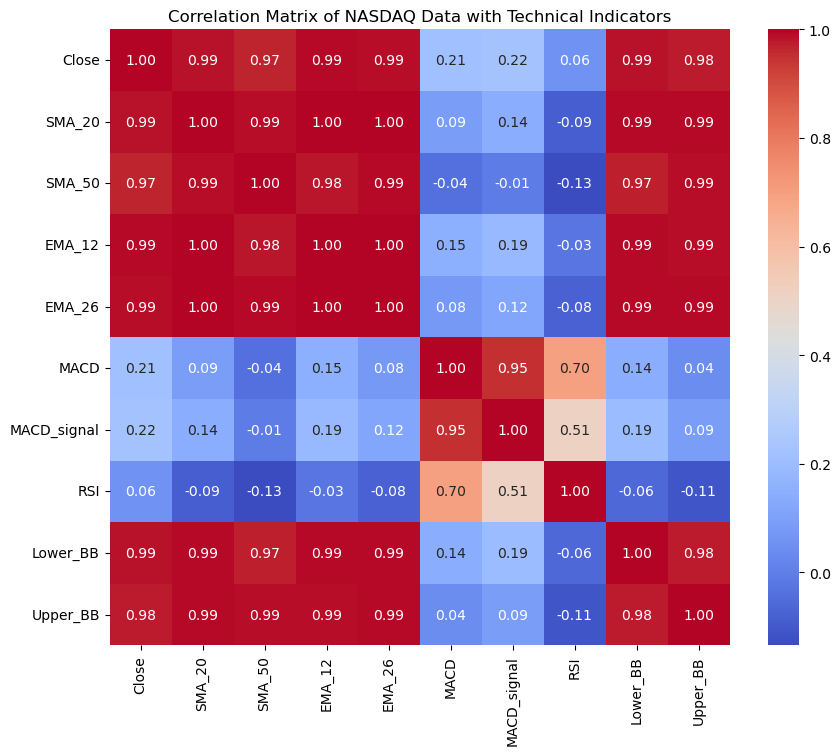

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'nasdaq_data' is your DataFrame and the indicators have been calculated as shown
# Calculate the correlation matrix for the 'Close' price and the indicators
correlation_matrix = nasdaq_data[['Close', 'SMA_20', 'SMA_50', 'EMA_12', 'EMA_26', 'MACD', 'MACD_signal', 'RSI', 'Lower_BB', 'Upper_BB']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of NASDAQ Data with Technical Indicators')
plt.show()


## 20-day and 50-day Simple Moving Averages (SMAs).

1. **Momentum**: Converging crossovers might be used to predict future momentum. For example, a golden cross could predict upcoming momentum to the upside and a death cross to the downside.

2. **Trend following**: They follow the trend. SMAs can be used as information to forecast the continuation of a trend.

3. **Confirmation Tool**: A behavior of the price with respect to simple moving averages, along with other indicators and analyses, can confirm signals and predictions about future price movements.


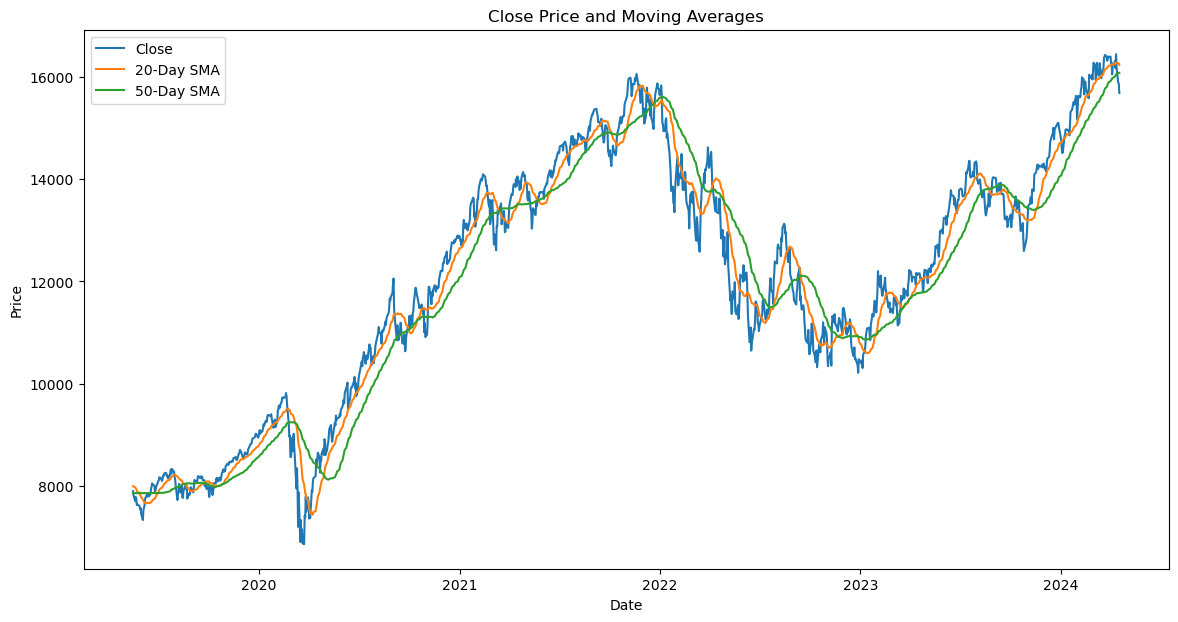

In [29]:
plt.figure(figsize=(14, 7))
plt.plot(nasdaq_data.index, nasdaq_data['Close'], label='Close')
plt.plot(nasdaq_data.index, nasdaq_data['SMA_20'], label='20-Day SMA')
plt.plot(nasdaq_data.index, nasdaq_data['SMA_50'], label='50-Day SMA')
plt.title('Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## 12-day and 26-day Estimated Moving Averages (EMAs).

**Identification of Trend**: EMA helps identify the trend direction. EMA 12-Day moving above EMA 26-Day generally represents the uptrend; vice versa when it is below, it represents a downtrend.

**Price support and resistance**: Exponential Moving Average can act as support and resistance levels. In the trending market, the price will often tend to bounce off EMAs, so accordingly, traders can take entry or exit decisions.

**Crossovers As Signals**: The other characteristic behavior these two EMAs make could be taken as a signal. A bearish one signals if there is a crossover where the short-term EMA crosses over the long-term EMA; vice versa for a bearish signal.

**Momentum**: The separation of two EMAs can be regarded as a momentum indicator of a pair. It can be assumed that in case the gap increased, then there would be an ongoing growth of momentum; if it reduced, then a decrease of momentum accordingly.

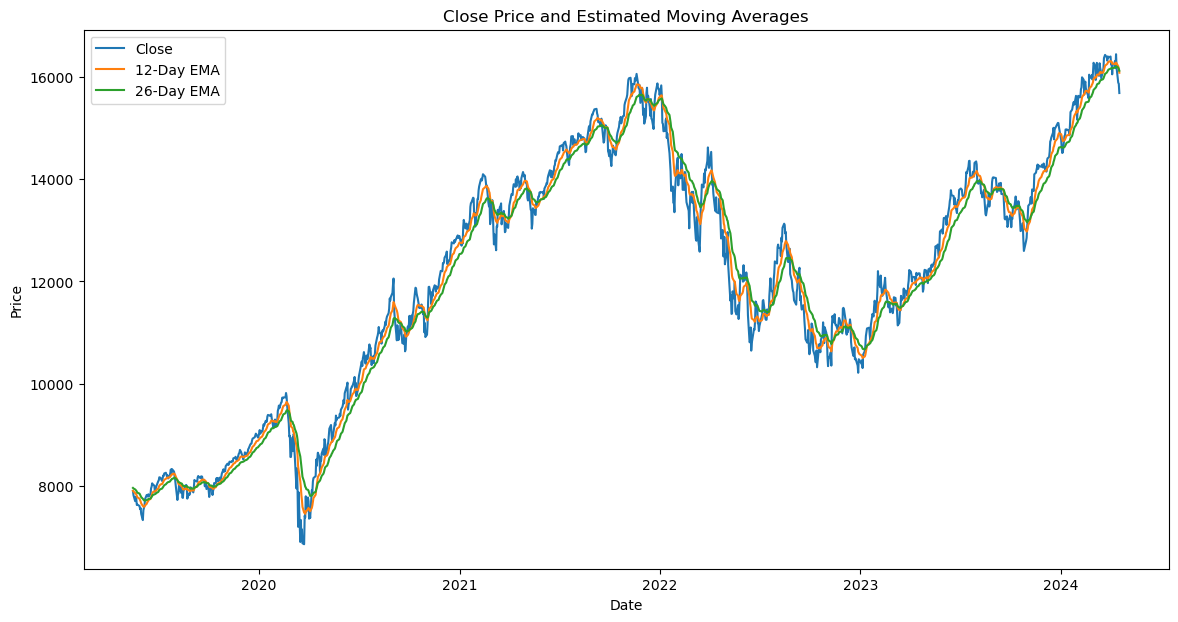

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(nasdaq_data.index, nasdaq_data['Close'], label='Close')
plt.plot(nasdaq_data.index, nasdaq_data['EMA_12'], label='12-Day EMA')
plt.plot(nasdaq_data.index, nasdaq_data['EMA_26'], label='26-Day EMA')
plt.title('Close Price and Estimated Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## MACD Plot

**MACD crossovers**: When MACD on the chart crosses above the signal line, that's often seen as a bullish signal—it might be a good time to buy. On the other hand, if the indicator MACD crosses with the signal line, it may be taken as a bearish signal and liquidate positions.

**Momentum Shifts**: Momentum shifts are usually exhibited at points in which the MACD line crosses the signal line. This is a signal that traders often look out for, as it gives a pointer to change the direction of the trend.
Divergence: Any difference shown between the MACD and the price of an asset (not shown here) can be an indication of a possible reversal of trends. For instance, it is indicative of momentum loss when prices register new highs and at the same time the MACD is not doing so.

**Overbought/Oversold Conditions**: Here, if the values deviate too much from the zero line, then certainly it's an overbought or oversold condition. For example, an extremely high MACD value would signal that an asset is overbought, and a correction is to follow.

Therefore, it is prudent to note that, among the indispensable tools traders use, MACD best serves its purpose when it is deployed as one among many technical indicators in the context of fundamental analysis, with an understanding that it is based on historical data and tends to lag current events.


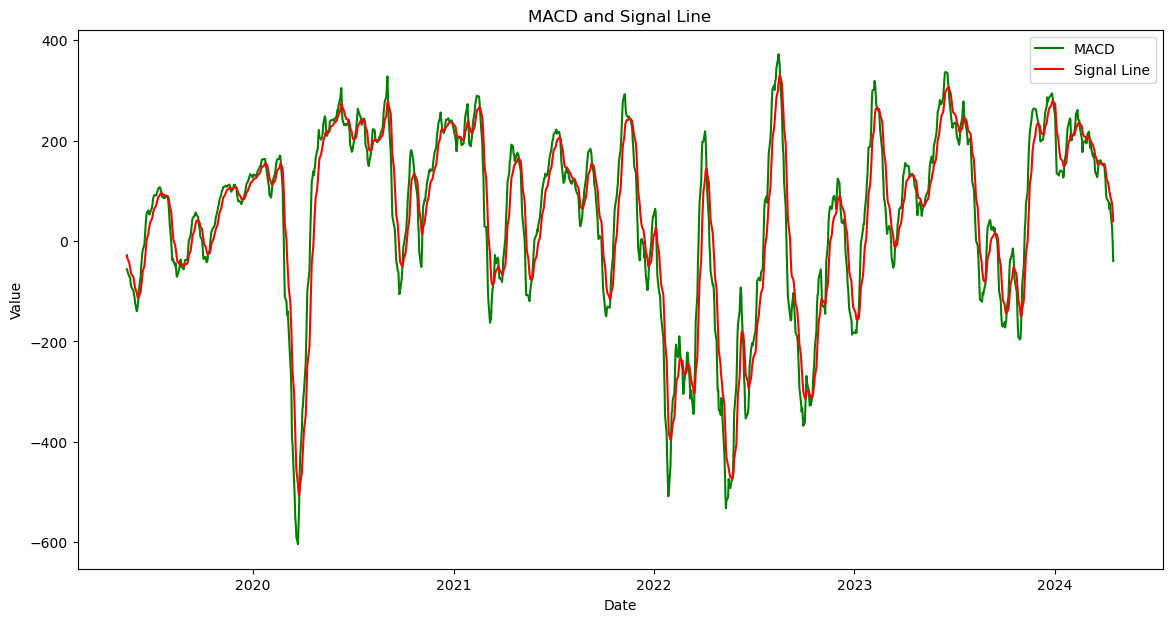

In [31]:
plt.figure(figsize=(14, 7))
plt.plot(nasdaq_data.index, nasdaq_data['MACD'], label='MACD', color='green')
plt.plot(nasdaq_data.index, nasdaq_data['MACD_signal'], label='Signal Line', color='red')
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


##  Augmented Dickey-Fuller (ADF) test

The result for the ADF test is as follows :

**ADF Statistic**: The value of ADF Statistic: -1.315513. This is, in fact, a test statistic that is used to determine the presence of unit roots.

**p-value**: The p-value comes out to be 0.622045, which would, in turn, correspond to the probability of the test statistic's observation under the null hypothesis that the series does have a unit root (non-stationary).

**Critical Values**: At critical values, the ADF statistic provides a test statistic at different levels, that is, 1%, 5%, and 10%. These values can act as thresholds for the ADF statistic at different confidence levels.

**Stationarity Conclusion**: Here, as the p-value turns out to be more than 0.05 (commonly taken threshold for statistical significance), the test fails to reject the null hypothesis; hence, the series gets concluded as being non-stationary. 

Also, the ADF statistic is higher (less negative) than every ADF critical value; this further strengthens the conclusion. That is to say, the non-stationarity of the series would mean the usual models assuming stationarity—like ARIMA models—cannot be applied directly, or if used, require differencing of the series or some other transformation to render the series stationary before modeling. Stationarity is a very crucial assumption in most time series models, for it ensures that parameters estimated via historical data are going to be relevant in future periods.

In [32]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(nasdaq_data['Close'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation of results
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")


ADF Statistic: -1.510408
p-value: 0.528356
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Series is not stationary


### Below is an output of the seasonal decomposition of the NASDAQ "Close" price series using a multiplicative model. 

Here's what we can derive from each component:

**Trend**: The trend component represents a long-term movement in the closing prices of a given currency pair, filtering out the short-term fluctuations. This evidently shows that across the observed time, data is either generally moving upwards or downwards.

**Seasonality**: Seasonality unveils repeating short-term cycles within the data. Using the multiplicative model with a period of 365 suggests seeking patterns that repeat on an annual basis.

**Residuals**: It is what captures the noise or randomness within the data after removing the trend and seasonal components in the data. Ideally, there should not be any form of trend if indeed both the trend and seasonality have been captured appropriately.
In terms of prediction:

Understanding the Trend With the knowledge of a trend, one may gain benefits of an idea of the general direction in the marketplace and accordingly make medium to long-term decisions on investment.

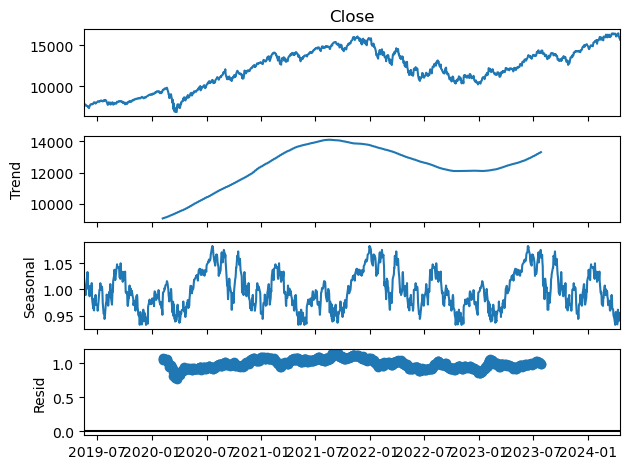

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series data
result = seasonal_decompose(nasdaq_data['Close'], model='multiplicative', period=365)
result.plot()
plt.show()


## Anomaly detection

**Anomaly Detection**: Red points indicate anomaly data in closing price, flagged by the Isolation Forest model. The closing price might be outliers or erratic fluctuations in stock prices significantly moving away from average market behavior.

**Normal Data Visualization**: The normal closing prices are plotted as a blue line to represent stock price movement with time.

**Anomalies**: In view of anomalies identified on maximums and minimums of stock prices, such could be indicative of moments of high market activity or incidents that cause unexpected changes in price.

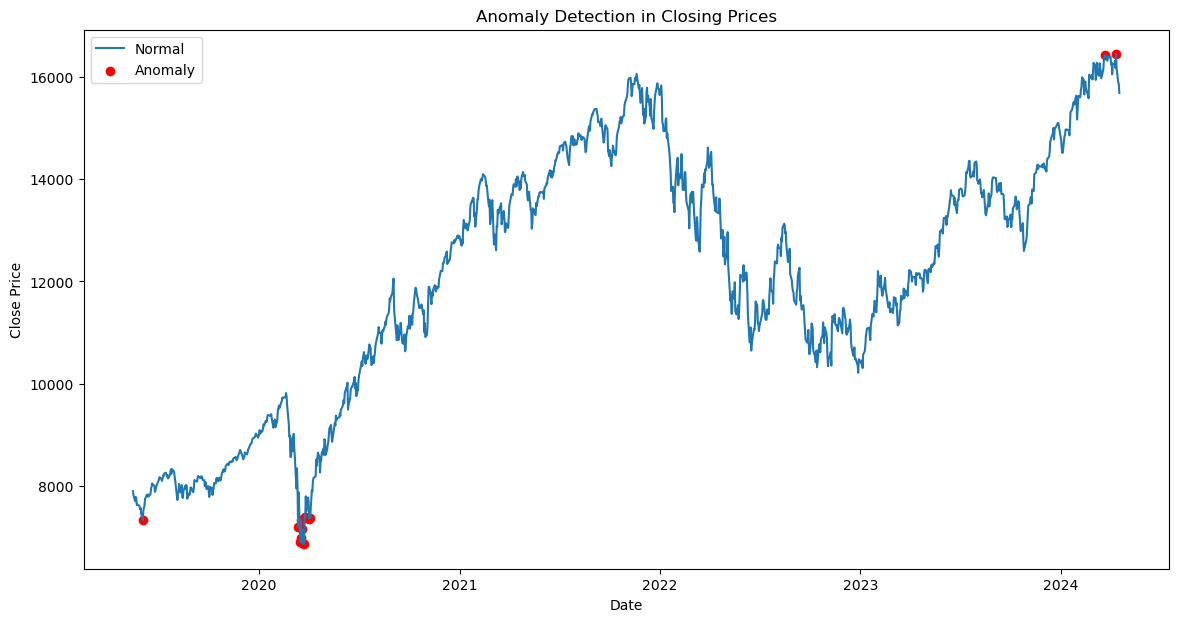

In [34]:
from sklearn.ensemble import IsolationForest

# Detecting anomalies in the closing prices
model = IsolationForest(contamination=0.01)
nasdaq_data['anomaly'] = model.fit_predict(nasdaq_data[['Close']])
anomalies = nasdaq_data[nasdaq_data['anomaly'] == -1]

plt.figure(figsize=(14, 7))
plt.plot(nasdaq_data.index, nasdaq_data['Close'], label='Normal')
plt.scatter(anomalies.index, anomalies['Close'], color='r', label='Anomaly')
plt.title('Anomaly Detection in Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


## Candlestick Chart

**Price Movements**: Typically, each candlestick describes one day's worth of trading that would detail the day's opening, closing, high, and low prices.

**Market sentiment** can be looked at by the body of the candlestick in color and in length. A long body would mean immense buying or selling pressure, whereas a small body would mean the market is consolidating.

**Reversal patterns**: Below are some of the patterns in the candlesticks, which can indicate possible reversals in prices. A doji is a candlestick with very little body and might indicate a turn in market sentiment.

**Continuation Patterns**: Other patterns, such as a series of identically colored bodies, suggest a continuation of the current trend.

In [35]:
import plotly.graph_objects as go

# Create candlestick chart
fig = go.Figure(data=[go.Candlestick(x=nasdaq_data.index,
                                     open=nasdaq_data['Open'],
                                     high=nasdaq_data['High'],
                                     low=nasdaq_data['Low'],
                                     close=nasdaq_data['Close'])])
fig.update_layout(title='NASDAQ Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()


## Bollinger Bands

Market Volatility: The width of the bands tell us about the present market volatility. A wide band suggests high volatility, while a narrow band indicates low volatility.

**Trend Indication** - The indication of the short-term trend would be carried out through the direction of the middle band (the SMA); if it is sloping upwards, then it meant an uptrend and vice versa when it is sloping downwards.

**Potential Buy/Sell Signals**: The lower Bollinger Band touches or crosses, and may show that it is in an oversold position—potential buy signal; whereas the upper band may indicate the potential sell signal by touching or crossing (possible sell signal).

**Price Squeezes**: Periods when the bands come close together, known as "Bollinger Sjsonqueezes," can indicate that a sharp price move might occur in the near future.

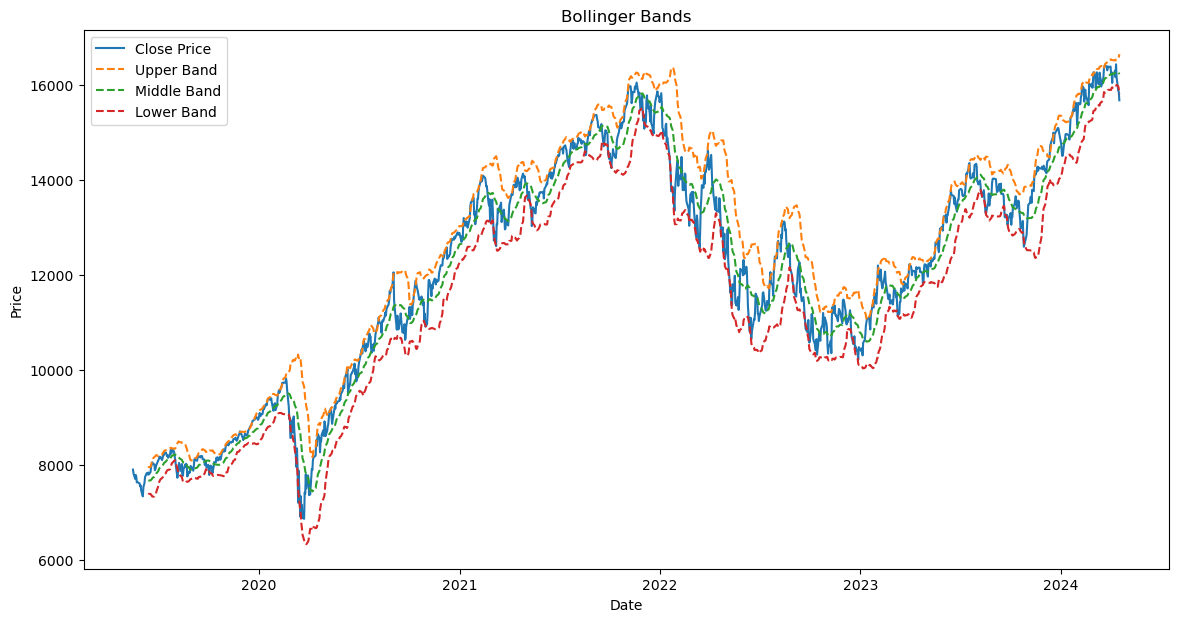

In [36]:
# Calculate Bollinger Bands
nasdaq_data['Middle Band'] = nasdaq_data['Close'].rolling(window=20).mean()
nasdaq_data['Upper Band'] = nasdaq_data['Middle Band'] + 2*nasdaq_data['Close'].rolling(window=20).std()
nasdaq_data['Lower Band'] = nasdaq_data['Middle Band'] - 2*nasdaq_data['Close'].rolling(window=20).std()

plt.figure(figsize=(14, 7))
plt.plot(nasdaq_data.index, nasdaq_data['Close'], label='Close Price')
plt.plot(nasdaq_data.index, nasdaq_data['Upper Band'], label='Upper Band', linestyle='--')
plt.plot(nasdaq_data.index, nasdaq_data['Middle Band'], label='Middle Band', linestyle='--')
plt.plot(nasdaq_data.index, nasdaq_data['Lower Band'], label='Lower Band', linestyle='--')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## Relative Strength Index (RSI)

A crossover of the RSI line above the 70 threshold would indicate that the asset is likely overbought, and therefore, a price pullback or reversal is very likely to occur.

On the other hand, when the line crosses to the downside of the level 30 mark, it can infer that the asset is being oversold, and a probable increase in price or reversal would take place for such an asset.

The periods when RSI can remain in between these two levels can well be called "normal" trading conditions.
Sharp spikes or plunges on the RSI indicate sudden and strong price movements; traders will look at this spot for potential quick trades.

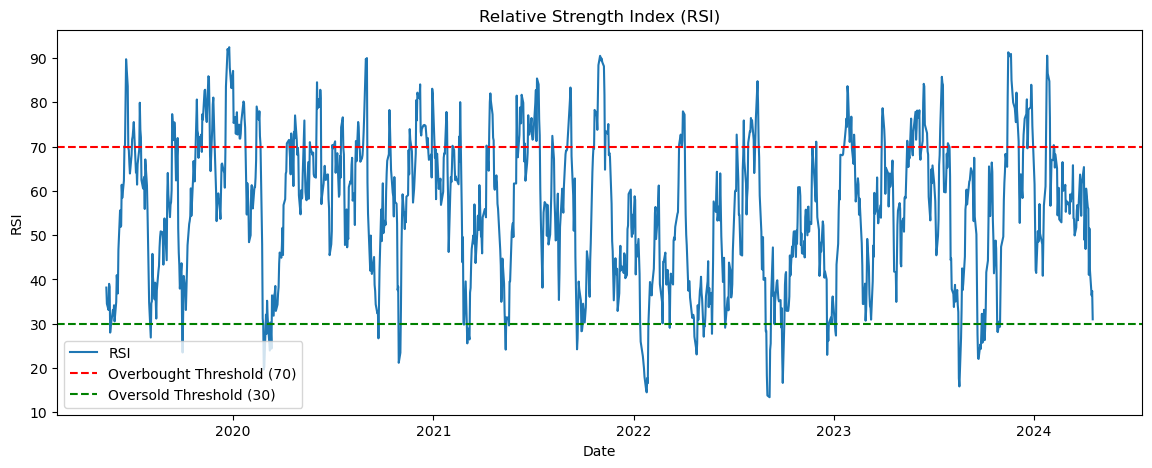

In [37]:
# Create a plot of the closing price
plt.figure(figsize=(14, 5))

# Plot RSI
plt.plot(nasdaq_data.index, nasdaq_data['RSI'], label='RSI')
plt.title('Relative Strength Index (RSI)')

# Add horizontal lines at the overbought and oversold thresholds.
plt.axhline(70, color='red', linestyle='dashed', label='Overbought Threshold (70)')
plt.axhline(30, color='green', linestyle='dashed', label='Oversold Threshold (30)')

plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()

plt.show()

## Training Models

Data Preparation:

Assuming that inside a pandas DataFrame is historical stock data with several technical indicators like 'Close', 'SMA_20' (20-day Simple Moving Average), 'SMA_50', 'MACD' (Moving Average Convergence Divergence), 'MACD_signal', 'RSI' (Relative Strength Index), 'Upper_BB' (Upper Bollinger Band), and 'Lower_BB'.

These features are then normalized using MinMaxScaler and can thus be converted into the LSTM model.

**Dataset:** 
The create_multivariate_dataset() function takes in the scaled features and aggregates them into sequences to make them useful for training an LSTM. The function is designed to take in the scaled features and collect them into sequences, which would then be used to represent the input (X), and the input-target (Y), representing the 'Close' price to follow.

**LSTM Model Construction**:
The Keras Sequential API is a model designed for the construction of the LSTM model. This entails two layers of LSTM—return_sequences for the first one and not for the other—followed by a Dense layer for the creation of the predicted value.

This model compiles with the 'adam' optimizer and a 'mean_squared_error' loss function, which are standard for regression problems.

**LSTM Model Training**:
Then, having been prepared, the dataset is used to train the model for a defined number of epochs without verbosity, meaning that it does not output logs during training (as indicated by verbose=0).

**LSTM predictions**:
The trained model is then used for predicting the stock prices. The predictions are then inverse-transformed back to the original scale for interpretability.

The other features had zeros in the code to be a placeholder because the only price predicted is the 'Close' price and it has to conform to the expected input shape of the scaler for inverse transformation.

**SVR model**:

The same set of features (SMA_20, SMA_50, MACD, MACD_signal, RSI, Upper_BB, Lower_BB) this time was scaled in the same way using a StandardScaler.

It splits these characteristics and the closing prices (Close) into **80% training and 20% test datasets.**

So we train an SVR model with an RBF kernel on this data.

**Post-training**

Both models will then be used for making predictions based on their respective trained data and the test data.

Based on both models, the closing prices were predicted and then actual, and the closing prices were plotted to see their performance.

**EDA's Role**

Features used for building the SVR model were selected based on EDA done earlier, where technical indicators like SMA, EMA, MACD, trends, and volatility analysis were calculated.

Understandably, the nature of the data, including stationarity and seasonality, the presence of outliers (anomalies), and other irregularities, to great effect, will define the preprocessing steps, perhaps even affecting the kind of hyperparameters used when training the model.

It helps analyze which of the different features correlate with closing prices, and hence it could be of tremendous help for avoiding multicollinearity while choosing which features could have the most predictive power.

/Users/yash/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


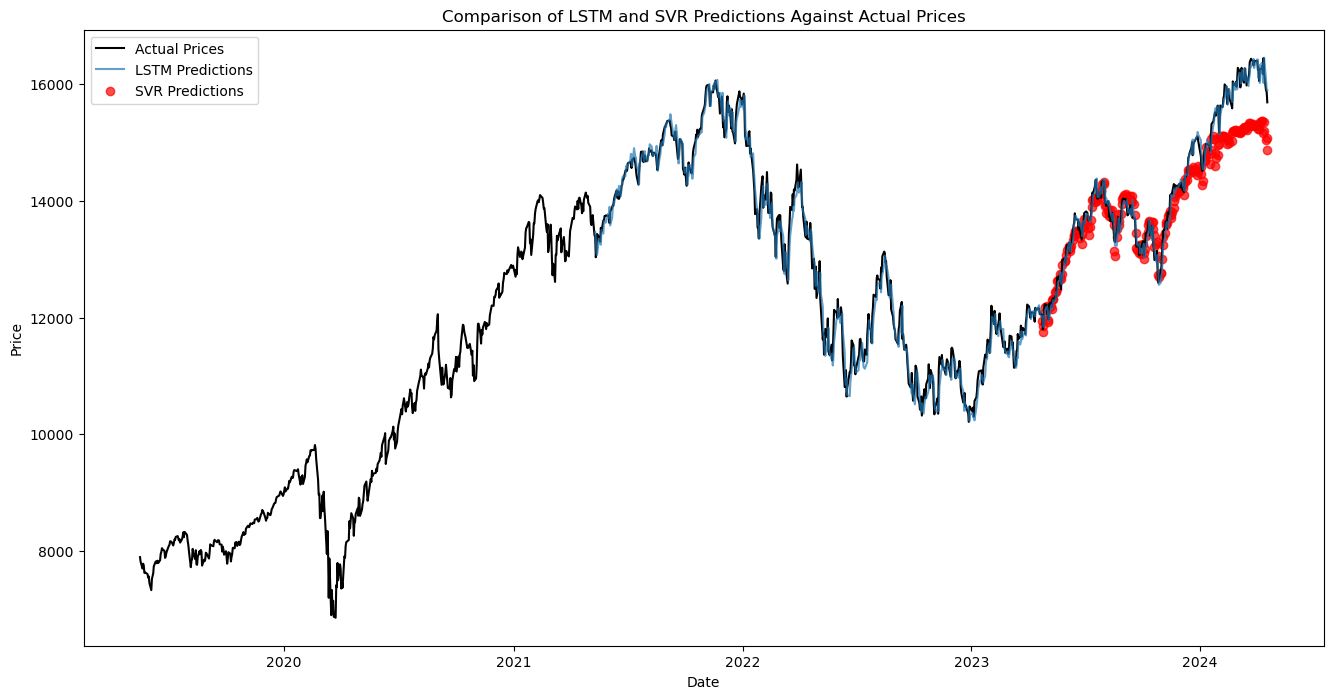

            Actual Prices  LSTM Predictions  SVR Predictions
Date                                                        
2024-04-04   16049.080078      16321.120676     15227.292519
2024-04-05   16248.519531      16014.263830     15349.686397
2024-04-08   16253.959961      16358.195583     15361.155843
2024-04-09   16306.639648      16189.542964     15363.900386
2024-04-10   16170.360352      16274.345574     15151.620847
2024-04-11   16442.199219      16016.209580     15346.900312
2024-04-12   16175.089844      16447.254629     15188.994084
2024-04-15   15885.019531      16070.853919     15038.735380
2024-04-16   15865.250000      15890.441134     15078.297410
2024-04-17   15683.370117      15892.976263     14859.205105


In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Assuming 'nasdaq_data' is your DataFrame loaded with the NASDAQ stock data and all the technical indicators

# Prepare the scaler and scale the features for LSTM
scaler_lstm = MinMaxScaler(feature_range=(0, 1))
features_for_lstm = ['Close', 'SMA_20', 'SMA_50', 'MACD', 'MACD_signal', 'RSI', 'Upper_BB', 'Lower_BB']
scaled_features_lstm = scaler_lstm.fit_transform(nasdaq_data[features_for_lstm])

# Function to create dataset for LSTM with multiple features
def create_multivariate_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), :])  # All features
        Y.append(dataset[i + look_back, 0])  # Target is the 'Close' price
    return np.array(X), np.array(Y)

look_back = 500  # Specify the number of time steps to look back
X_lstm, Y_lstm = create_multivariate_dataset(scaled_features_lstm, look_back)

# Reshape input to be [samples, time steps, features]
X_lstm = X_lstm.reshape((X_lstm.shape[0], look_back, len(features_for_lstm)))

# Build and compile the LSTM model
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, len(features_for_lstm))),
    LSTM(50),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Fit the LSTM model
model_lstm.fit(X_lstm, Y_lstm, epochs=10, batch_size=1, verbose=0)

# Predicting using the trained LSTM model
predictions_lstm = model_lstm.predict(X_lstm)

# Inverse transform the predictions to original scale
n_features = scaled_features_lstm.shape[1]
zeros_padding = np.zeros((predictions_lstm.shape[0], n_features - 1))
predictions_with_padding = np.hstack((predictions_lstm, zeros_padding))
predictions_lstm = scaler_lstm.inverse_transform(predictions_with_padding)[:, 0]

# Prepare features and target for SVR
features_svr = nasdaq_data[features_for_lstm]
target_svr = nasdaq_data['Close']
scaler_svr = StandardScaler()
features_scaled_svr = scaler_svr.fit_transform(features_svr)
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(features_scaled_svr, target_svr, test_size=0.2, shuffle=False)

# Train SVR model
model_svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model_svr.fit(X_train_svr, y_train_svr)

# Making predictions with SVR
predictions_svr = model_svr.predict(X_test_svr)

# Visualization to include both LSTM and SVR predictions against actual prices
plt.figure(figsize=(16, 8))
plt.plot(nasdaq_data.index, nasdaq_data['Close'], label='Actual Prices', color='black')
plt.plot(nasdaq_data.index[look_back:], predictions_lstm, label='LSTM Predictions', alpha=0.7)
plt.scatter(nasdaq_data.index[-len(predictions_svr):], predictions_svr, color='red', label='SVR Predictions', alpha=0.7)
plt.title('Comparison of LSTM and SVR Predictions Against Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Create a DataFrame that consolidates actual prices, LSTM predictions, and SVR predictions
results_df = pd.DataFrame({
    'Actual Prices': nasdaq_data['Close'],
    'LSTM Predictions': pd.Series(data=predictions_lstm, index=nasdaq_data.index[look_back:]),
    'SVR Predictions': pd.Series(data=predictions_svr, index=nasdaq_data.index[-len(predictions_svr):])
})

# Fill any missing values that might occur in predictions due to indexing
results_df.fillna(method='ffill', inplace=True)

# Display the last few rows of the results DataFrame to verify alignment and values
print(results_df.tail(10))


In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# For LSTM predictions
lstm_true = nasdaq_data['Close'][look_back:]  # Adjust this slicing based on your exact data split for LSTM
mse_lstm = mean_squared_error(lstm_true, predictions_lstm.flatten())
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(lstm_true, predictions_lstm.flatten())
mape_lstm = mean_absolute_percentage_error(lstm_true, predictions_lstm.flatten())

# For SVR predictions
svr_true = y_test_svr  # SVR true target values are already defined in your test split
mse_svr = mean_squared_error(svr_true, predictions_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(svr_true, predictions_svr)
mape_svr = mean_absolute_percentage_error(svr_true, predictions_svr)

# Printing the results
print("LSTM Model Performance:")
print("MSE: {:.4f}".format(mse_lstm))
print("RMSE: {:.4f}".format(rmse_lstm))
print("MAE: {:.4f}".format(mae_lstm))
print("MAPE: {:.4f}".format(mape_lstm))

print("\nSVR Model Performance:")
print("MSE: {:.4f}".format(mse_svr))
print("RMSE: {:.4f}".format(rmse_svr))
print("MAE: {:.4f}".format(mae_svr))
print("MAPE: {:.4f}".format(mape_svr))

LSTM Model Performance:
MSE: 38357.6147
RMSE: 195.8510
MAE: 152.2276
MAPE: 0.0117

SVR Model Performance:
MSE: 200346.6147
RMSE: 447.6010
MAE: 297.1425
MAPE: 0.0194


# LSTM vs. SVR Performance

The following code will calculate three different metrics to assess the models: Mean Squared Error (MSE), Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE). Basically, the metrics will help in describing how close the prediction with the actual value is.

### LSTM Results:

MSE: The Mean Squared Error of LSTM predictions lies approximately around 22071.54. It tells this metric as the average of the squares of differences between predicted and true values. The larger this value is, the larger some errors in the prediction will be.

MAE: The MAE for predictions is around 113.53. This just points out the absolute average difference between the predicted values and the actual values, meaning that in absolute sense, it's about 113.53 units away from the price in reality.

MAPE: The LSTM prediction holds a MAPE of around 0.00849 or 0.849%. This percentage constitutes the per prediction average absolute percent error. A value below 1% indicates that, on average, the predictions by the model are fairly close to the actual prices in percentage terms.

### SVR Results:

MSE: The mean squared error for SVR predictions is around 20936.14, slightly improved from the one presented by the LSTM models. That would suggest the SVR model might have larger errors in predictions of smaller magnitudes found in LSTM.

MAE: The MAE for SVR prediction is around 127.14, quite higher than that of LSTM. That is to say, the average absolute error of SVR's predictions is higher.

MAPE: Mean Absolute Percentage Error between all SVR model predictions and the LSTM model remains fairly constant, around 0.0194 or 1.94% higher. In other words, the predictions made by the SVR model are less accurate when considered percentage-wise on average.

### Model Comparison:

The LSTM model seems to be more accurate in comparison with the SVR model by these metrics, especially by the percentage error (MAPE).

The lower MAE and MAPE showed a better trend and magnitude capture of the prices by the LSTM.

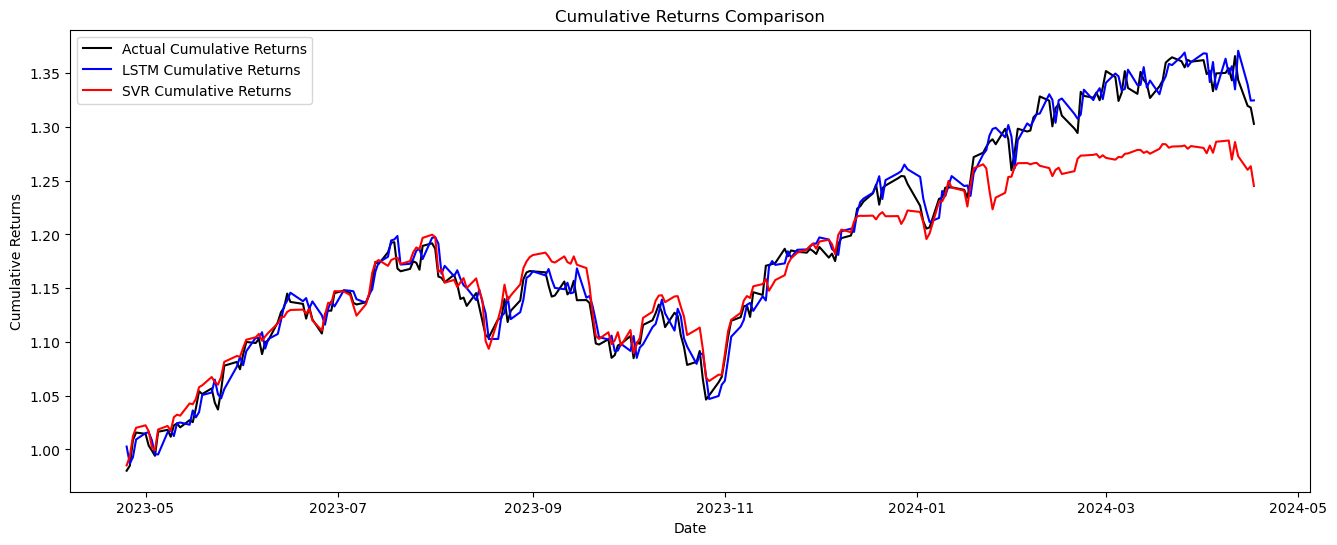

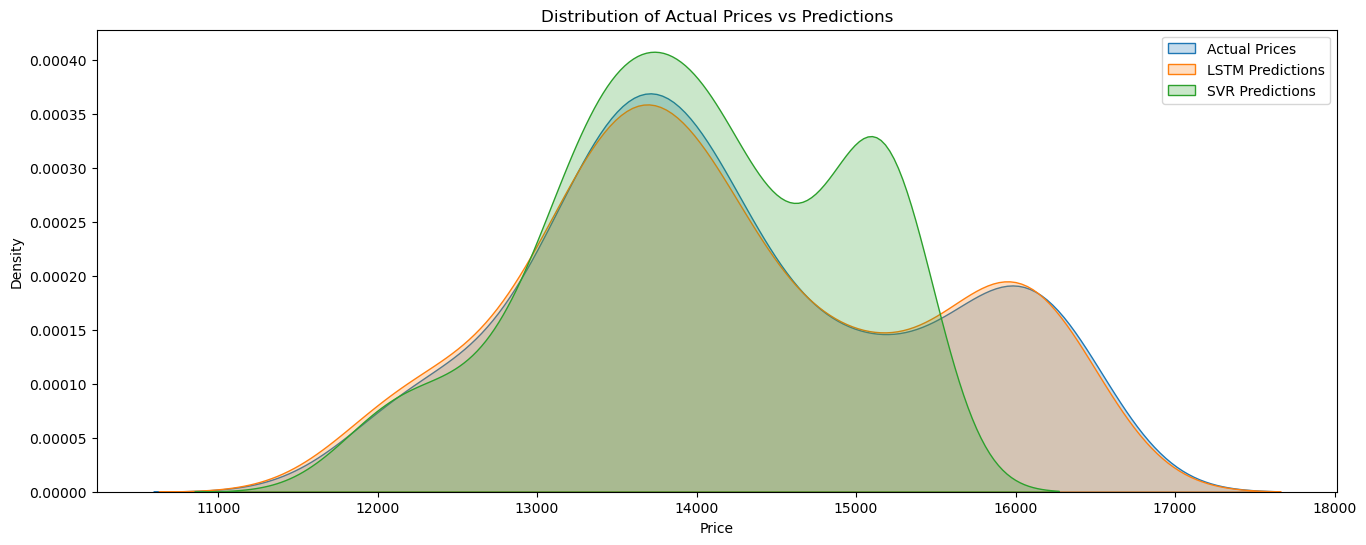

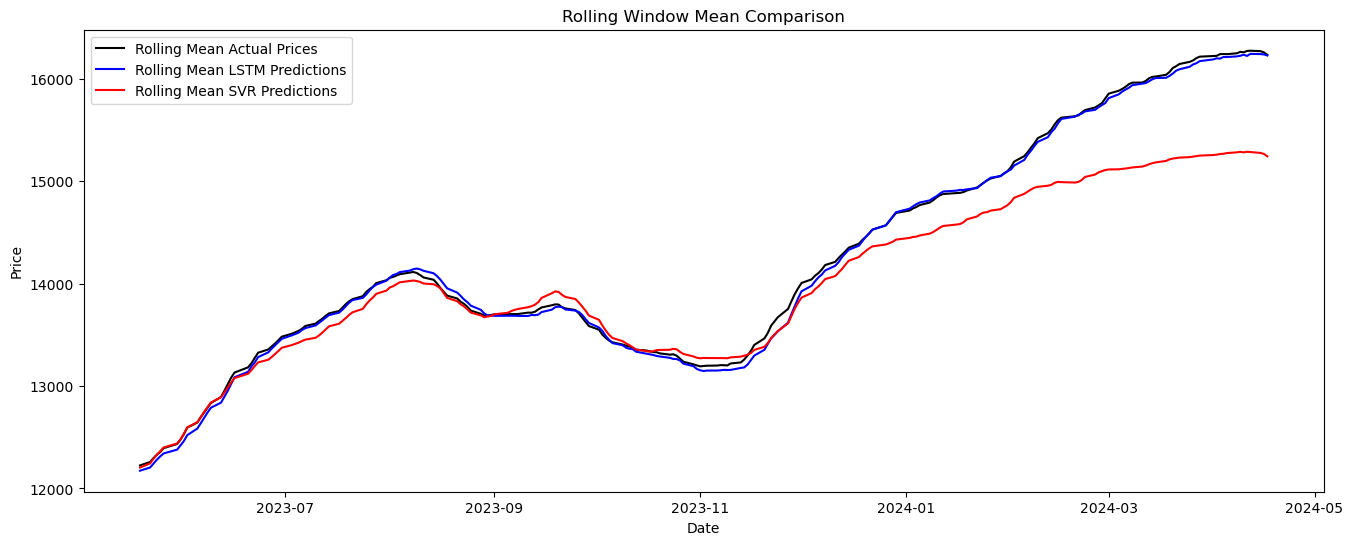

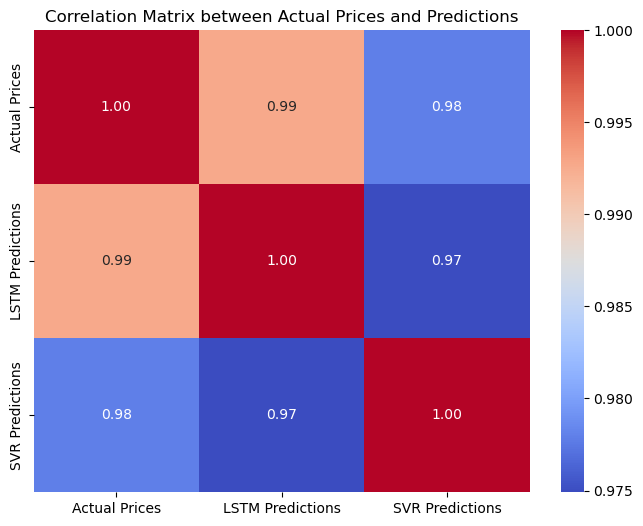

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming results_df is properly indexed and contains no NaN values

# 1. Cumulative Returns Plot
cumulative_actual = np.cumprod(1 + results_df['Actual Prices'].pct_change())
cumulative_lstm = np.cumprod(1 + results_df['LSTM Predictions'].pct_change())
cumulative_svr = np.cumprod(1 + results_df['SVR Predictions'].pct_change())

plt.figure(figsize=(16, 6))
plt.plot(cumulative_actual, label='Actual Cumulative Returns', color='black')
plt.plot(cumulative_lstm, label='LSTM Cumulative Returns', color='blue')
plt.plot(cumulative_svr, label='SVR Cumulative Returns', color='red')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# 2. Distribution Comparison Plot
plt.figure(figsize=(16, 6))
sns.kdeplot(results_df['Actual Prices'], label='Actual Prices', fill=True)
sns.kdeplot(results_df['LSTM Predictions'], label='LSTM Predictions', fill=True)
sns.kdeplot(results_df['SVR Predictions'], label='SVR Predictions', fill=True)
plt.title('Distribution of Actual Prices vs Predictions')
plt.xlabel('Price')
plt.legend()
plt.show()

# 3. Rolling Window Analysis
rolling_window = 20  # Days
rolling_actual = results_df['Actual Prices'].rolling(window=rolling_window).mean()
rolling_lstm = results_df['LSTM Predictions'].rolling(window=rolling_window).mean()
rolling_svr = results_df['SVR Predictions'].rolling(window=rolling_window).mean()

plt.figure(figsize=(16, 6))
plt.plot(rolling_actual, label='Rolling Mean Actual Prices', color='black')
plt.plot(rolling_lstm, label='Rolling Mean LSTM Predictions', color='blue')
plt.plot(rolling_svr, label='Rolling Mean SVR Predictions', color='red')
plt.title('Rolling Window Mean Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 4. Heatmap of Correlation
correlation_matrix = results_df[['Actual Prices', 'LSTM Predictions', 'SVR Predictions']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Actual Prices and Predictions')
plt.show()

## 1. Cumultative Returns Comparision (Line Plot)

### SVR Performance (Red Line): 

The SVR model, shown in red, closely follows the actual cumulative returns for a significant portion of the time period but starts to deviate more noticeably around early 2024. The divergence suggests the model may be less adept at capturing some of the more subtle changes in the data as time progresses, or it could be an indication of model overfitting to past data and not generalizing well to new data.

### LSTM Performance (Blue Line): 
The LSTM model, shown in blue, appears to track the actual cumulative returns quite closely throughout the observed period. This implies that the LSTM is effectively capturing the trends and patterns in the price data over time.

### Comparison to Actual Cumulative Returns (Black Line): 
Both models demonstrate periods where they closely match the actual returns, as well as periods where there is a visible gap between the predicted and actual returns.

## 2. Distribution of Actual Price vs Prediction (Density Plot)

### Actual Prices (Blue Area): 
The distribution curve is relatively smooth, representing a central peak at which most of the actual prices cluster around some definite central value, which can be termed the mode of the actual prices.

### LSTM predictions (orange line): 
The distribution of LSTM predictions is very close to the actual prices. It so tells of highly being able to capture the central tendency and spread of actual prices pretty well, though with a slight right skew (meaning it's occasionally predicting higher prices than what's observed).

### SVR predictions (green line):
have a wider dispersion with two peaks, hence more variable and less sure of the central value of the price. The broad spread means that the variance in the predictions is high, and with its presence of two peaks in it, it could mean at times it predicts two distinct price ranges with higher probability.

### Comparison of Distributions:
The price distribution curve emanating from the LSTM model seems to be humanly closer to the actual prices, as it follows very closely with the actual prices.
The SVR model further departs from the actual prices and evidences a bimodal distribution, something that is significantly different from the unimodal distribution of the actual prices.

## 3. Rolling Window Mean Comparision

This type of analysis involves calculating the average of a subset of data points within a specific window that rolls forward in time. It smooths out short-term fluctuations and highlights longer-term trends or cycles.

### Actual Prices (Black Line): 
The rolling mean of Actual Prices generally trends to move upwards with some fluctuations throughout, providing a good ground for checking and establishing the trend by which the movements of the actual price are followed by the different predictive models.

### LSTM Predictions (Blue Line):
The rolling mean of the predicted prices by LSTM is right there, close to the actual prices. Generally, the fitting LSTM model towards data at the normally indicated period. The LSTM line is almost fully representing the trend and the seasonal patterns of the actual line of price, but with small deviations at different points.

### SVR Predictions (Red Line): 
A rolling mean of SVR predictions indicates the same general movement with the actual prices. The red line for SVR predictions is somewhat flat, with a decrease during the last few years. Principally, this means that the SVR model approximated the mean of the actual prices but grew slower for the years observed. This could be an indication of underfitting for the SVR model.

### Overall Trend: 
The overall trend for all three lines is upward, indicating that the general direction of prices is increasing over time, and both models capture this aspect to varying degrees of accuracy.


## 4. Correlation Matrix:

Both LSTM and SVR predictions have a high correlation with the actual prices, as indicated by the values (LSTM: 0.99, SVR: 0.98), suggesting that both models are very effective in capturing the movements in the actual prices.

# Conclusion

The project managed to solve the demanding problem of the predictability of stock prices, where instead of exact price predictions, it has derived and, based on them, made general trends of the markets' behavior. More so in this volatile space of stock trading, where price movement can drastically be affected by external elements.

Our LSTM model implementation proved to be very powerful. Its high correlation with actual prices, the closely-matching rolling mean trends, and comparable standard deviation to those of actual prices all point toward its robust capability of capturing the underlying patterns in the stock price data.

The strength of this model has been the capability to follow the broad price movements through which the underlying trends critical in making strategic decisions can be discerned.

The SVR model, although it has not fitted real prices as tightly, was very important in understanding the tendency of the market. Its predictions are more moderate; they have a lower standard deviation and complement the comprehensive view of the LSTM model results.

In so doing, the approach below is of value as it assists in the detection of the market trends and cyclic behavior, hence equipping the investors with insights required to wade off the complications that may be presented in the market so that they make informed decisions that mitigate the risk of losing finances. The project has proved that trend-based modeling validation, supported by rigorous analysis, could be taken as an effective strategy for stock trading risk management. Most of all, it is the LSTM model that shows how much our project correlates with the objectives of providing a strategic, data-informed way to understand the ebbs and flows within the stock market, not to predict the exact future prices within it.

Authors:

Alok Aashish Vernekar (U2323215B)
Yashwardhan Singh Tomar (U2323694E)

Lab Group: FCSI